In [1]:
# the data is https://openpolicing.stanford.edu/data/


# # Exploring United States Policing Data Using Python
#My porpuse is to clear and visualaze some of my data dor the State vermont

In [2]:
#import some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [3]:
#import my data 
df=pd.read_csv('vermont.csv',header=0)

C:\Users\jim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Exploration & Cleansing 

In [4]:
#i want to see how looks  my dataframe
df.head(10)

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
0,VT-2010-00001,VT,2010-07-01,00:10,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
1,VT-2010-00002,VT,2010-07-01,00:10,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,...,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
2,VT-2010-00003,VT,2010-07-01,00:10,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,...,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
3,VT-2010-00004,VT,2010-07-01,00:11,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
4,VT-2010-00005,VT,2010-07-01,00:35,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08
5,VT-2010-00006,VT,2010-07-01,00:44,Hardwick,Caledonia County,50005.0,64000 I 91 N; MM64 I 91 N,ROYALTON VSP,F,...,White,Vehicle Equipment,Equipment,False,No Search Conducted,NaN,False,Written Warning,False,-6.032327e+08
6,VT-2010-00007,VT,2010-07-01,00:50,NaN,NaN,NaN,I 91 N,ST JOHNSBURY VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-9.697686e+08
7,VT-2010-00008,VT,2010-07-01,00:55,NaN,NaN,NaN,I 91 N,ST JOHNSBURY VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,-9.697686e+08
8,VT-2010-00009,VT,2010-07-01,01:10,Rochester,Windsor County,50027.0,36000 I 91 S; MM36 I 91 S,ROCKINGHAM VSP,M,...,Black,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,2.939526e+08
9,VT-2010-00010,VT,2010-07-01,01:38,Rutland City,Rutland County,50021.0,WEST St,RUTLAND VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,3.559631e+08


In [5]:
df.shape# the shape of df


(283285, 23)

In [6]:
#columns names
df.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'officer_id'],
      dtype='object')

In [7]:
#check the type of each columns
df.dtypes

id                        object
state                     object
stop_date                 object
stop_time                 object
location_raw              object
county_name               object
county_fips              float64
fine_grained_location     object
police_department         object
driver_gender             object
driver_age_raw           float64
driver_age               float64
driver_race_raw           object
driver_race               object
violation_raw             object
violation                 object
search_conducted            bool
search_type_raw           object
search_type               object
contraband_found          object
stop_outcome              object
is_arrested                 bool
officer_id               float64
dtype: object

In [8]:
#some informations about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283285 entries, 0 to 283284
Data columns (total 23 columns):
id                       283285 non-null object
state                    283285 non-null object
stop_date                283285 non-null object
stop_time                283285 non-null object
location_raw             282591 non-null object
county_name              282580 non-null object
county_fips              282580 non-null float64
fine_grained_location    282938 non-null object
police_department        283285 non-null object
driver_gender            281573 non-null object
driver_age_raw           282114 non-null float64
driver_age               281999 non-null float64
driver_race_raw          279301 non-null object
driver_race              278468 non-null object
violation_raw            281107 non-null object
violation                281107 non-null object
search_conducted         283285 non-null bool
search_type_raw          281045 non-null object
search_type             

In [9]:
#does it include NaN values?As well find how many for each column
df.isnull().sum()

id                            0
state                         0
stop_date                     0
stop_time                     0
location_raw                694
county_name                 705
county_fips                 705
fine_grained_location       347
police_department             0
driver_gender              1712
driver_age_raw             1171
driver_age                 1286
driver_race_raw            3984
driver_race                4817
violation_raw              2178
violation                  2178
search_conducted              0
search_type_raw            2240
search_type              279866
contraband_found             34
stop_outcome               2325
is_arrested                   0
officer_id                   12
dtype: int64

In [10]:
#i must drop the column "search_type" because all the elements are NaN 
df=df.drop(columns=["search_type"])


In [11]:
#check the column "state" and drop it(useless)
print(df.state.value_counts())
df=df.drop(columns="state")#it is contains the same value VT..must be dropped


VT    283285
Name: state, dtype: int64


In [12]:
#the "id" column contain a number with VT at the beginning for all elements.For this reason i will delete the VT with regular expressions
print(df.id.head(5))
df.id=df.id.apply(lambda x: x.replace("VT-"," "))
print(df.id.head(5))



0    VT-2010-00001
1    VT-2010-00002
2    VT-2010-00003
3    VT-2010-00004
4    VT-2010-00005
Name: id, dtype: object
0     2010-00001
1     2010-00002
2     2010-00003
3     2010-00004
4     2010-00005
Name: id, dtype: object


In [13]:
#i examine if contain the similar pattent in each element of "ID" column
patt="\d{4}-\d{5}"
con=df.id.str.contains(patt)#find if contains the pattern
print(con.value_counts())
#all elements have similar patt..the "ID" is more clear now

True    283285
Name: id, dtype: int64


In [14]:
#observe that exists two diffirent columns with time and date respectively.i will join them together..
df.stop_date.head(5)


0    2010-07-01
1    2010-07-01
2    2010-07-01
3    2010-07-01
4    2010-07-01
Name: stop_date, dtype: object

In [15]:
df.stop_time.head(5)

0    00:10
1    00:10
2    00:10
3    00:11
4    00:35
Name: stop_time, dtype: object

In [16]:
# "dt" the new column with date and time 
df["dt"]=df.stop_date.str.cat(df.stop_time,sep=" ")
print(df.dt.head(10))
df.dt=pd.to_datetime(df.dt)#become datetime type
print(df.dt.dtypes)#check if is datetime64 ok


0    2010-07-01 00:10
1    2010-07-01 00:10
2    2010-07-01 00:10
3    2010-07-01 00:11
4    2010-07-01 00:35
5    2010-07-01 00:44
6    2010-07-01 00:50
7    2010-07-01 00:55
8    2010-07-01 01:10
9    2010-07-01 01:38
Name: dt, dtype: object
datetime64[ns]


In [17]:
#must be dropped the "stop_date" and the "stop_time" ,i created other column for them ("dt")
df=df.drop(columns=["stop_date","stop_time"])
print(df.columns)


Index(['id', 'location_raw', 'county_name', 'county_fips',
       'fine_grained_location', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'contraband_found', 'stop_outcome', 'is_arrested', 'officer_id', 'dt'],
      dtype='object')


In [18]:
#change  the index  from "id" to "dt"
df.set_index("dt",inplace=True)


In [19]:
df.head(6)#simple to check if all is good

,id,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,contraband_found,stop_outcome,is_arrested,officer_id
dt,,,,,,,,,,,,,,,,,,,
2010-07-01 00:10:00,2010-00001,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,22.0,22.0,White,White,Moving Violation,Moving violation,False,No Search Conducted,False,Citation,False,-1.562157e+09
2010-07-01 00:10:00,2010-00002,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,21.0,21.0,White,White,Externally Generated Stop,Other,False,No Search Conducted,False,Arrest for Violation,True,-1.562157e+09
2010-07-01 00:10:00,2010-00003,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,21.0,21.0,White,White,Externally Generated Stop,Other,False,No Search Conducted,False,Arrest for Violation,True,-1.562157e+09
2010-07-01 00:11:00,2010-00004,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,18.0,18.0,White,White,Moving Violation,Moving violation,False,No Search Conducted,False,Arrest for Violation,True,-3.126844e+08
2010-07-01 00:35:00,2010-00005,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,18.0,18.0,White,White,Moving Violation,Moving violation,False,No Search Conducted,False,Written Warning,False,9.225661e+08
2010-07-01 00:44:00,2010-00006,Hardwick,Caledonia County,50005.0,64000 I 91 N; MM64 I 91 N,ROYALTON VSP,F,20.0,20.0,White,White,Vehicle Equipment,Equipment,False,No Search Conducted,False,Written Warning,False,-6.032327e+08


In [ ]:
#what is "police_departments" (this have 0 NaN) 
print(df.police_department.unique())#it is clear but i must remove VSP because exists in all
df.police_department=df.police_department.apply(lambda x: x.replace("VSP",""))
print(df.police_department.unique())
print(df.police_department.dtypes)#it is OK


['MIDDLESEX VSP' 'NEW HAVEN VSP' 'ROYALTON VSP' 'ST JOHNSBURY VSP'
 'ROCKINGHAM VSP' 'RUTLAND VSP' 'ST ALBANS VSP'
 'VSP HEADQUARTERS - FIELD FORCE' 'BRATTLEBORO VSP' 'WILLISTON VSP'
 'SHAFTSBURY VSP' 'DERBY VSP' 'BRADFORD VSP' 'VSP HQ- BCI/SIU/NIU']
['MIDDLESEX ' 'NEW HAVEN ' 'ROYALTON ' 'ST JOHNSBURY ' 'ROCKINGHAM '
 'RUTLAND ' 'ST ALBANS ' ' HEADQUARTERS - FIELD FORCE' 'BRATTLEBORO '
 'WILLISTON ' 'SHAFTSBURY ' 'DERBY ' 'BRADFORD ' ' HQ- BCI/SIU/NIU']
object


In [ ]:
print(df.search_conducted.dtypes)#check the type of the column ,it is ok


bool


In [ ]:
#it's time to clear from the NaN all my Dataframe ,i want as well to observe the diffirence between the shape before drop and after 

before=df.shape
print("Before drop NaN :  ",before)

df=df.dropna(axis=0, how='any')#drop all the raw if include at least one NaN 
after=df.shape
print("After drop NaN :  ",df.shape)

Before drop NaN :   (283285, 19)
After drop NaN :   (273181, 19)


In [ ]:
#check if dropped
print(df.isnull().sum())
#it is OK

id                       0
location_raw             0
county_name              0
county_fips              0
fine_grained_location    0
police_department        0
driver_gender            0
driver_age_raw           0
driver_age               0
driver_race_raw          0
driver_race              0
violation_raw            0
violation                0
search_conducted         0
search_type_raw          0
contraband_found         0
stop_outcome             0
is_arrested              0
officer_id               0
dtype: int64


In [ ]:
#see the unique values of "violation"
df.violation.unique()


#"Not mapped" means that, for some reason, the process couldn't find any resources to deploy that component to.
#i must drop these data
df=df[df.violation!='Other (non-mapped)']
df.violation.unique()


array(['Moving violation', 'Equipment', 'Other', 'DUI'], dtype=object)

In [ ]:
# i suspect that  "driver_age" and "driver age_raw"is the some
state=df['driver_age'].equals(df['driver_age_raw'])
print("Do the two columns have the same elements in each row?" ,state)

Do the two columns have the same elements in each row? True


In [ ]:
#must drop the "driver_age_raw" because is the same with "driver_age"
df=df.drop("driver_age_raw",axis=1)

In [ ]:
#i suspect that "driver_race_raw" and "driver_race" is exacly the same.I check it now
state2=df['driver_race_raw'].equals(df['driver_race'])
print("Do the two columns have the same elements in each row?" ,state2)
#must examine much
print(df.driver_race.value_counts())
print(df.driver_race_raw.value_counts())#maybe the only diffirence is the other and Native american is the same with diffirent name

Do the two columns have the same elements in each row? False
White       261337
Black         5571
Asian         3446
Hispanic      2562
Other          263
Name: driver_race, dtype: int64
White                             261337
Black                               5571
Asian or Pacific Islander           3446
Hispanic                            2562
Native Americn or Alaskn Nativ       263
Name: driver_race_raw, dtype: int64


In [ ]:
#remame the Native Americn or Alaskin Nativ to Other in the "driver_race_raw"
df.driver_race_raw=df.driver_race_raw.str.replace("Native Americn or Alaskn Nativ","Other")
#rename the "Asian" to "Asian or Pacific Islander"
df.driver_race=df.driver_race.str.replace("Asian","Asian or Pacific Islander")
print(df.driver_race.value_counts())
print(df.driver_race_raw.value_counts())
df['driver_race_raw'].equals(df['driver_race'])#it is the same.. drop one
df=df.drop('driver_race_raw',axis=1)

White                        261337
Black                          5571
Asian or Pacific Islander      3446
Hispanic                       2562
Other                           263
Name: driver_race, dtype: int64
White                        261337
Black                          5571
Asian or Pacific Islander      3446
Hispanic                       2562
Other                           263
Name: driver_race_raw, dtype: int64


In [ ]:
#i suspect that "violation" and "violation_raw" is the same.I check it now
print(df.violation.value_counts())
print(df.violation_raw.value_counts())
#it is the same but the column "violation_raw"seperate the column Others from "violation" to two parts..It have more details i will keep it
df=df.drop("violation",axis=1)
#i  rename the column "violation_raw" to "violation"
df.rename(columns={'violation_raw':'violation',}, inplace=True)

Moving violation    212100
Equipment            50600
Other                 9768
DUI                    711
Name: violation, dtype: int64
Moving Violation             212100
Vehicle Equipment             50600
Externally Generated Stop      6160
Investigatory Stop             3608
Suspicion of DWI                711
Name: violation_raw, dtype: int64


In [ ]:
df.search_type_raw.value_counts()

No Search Conducted               269914
Consent Search-Probable Cause       2206
Consent Search-Rsnbl Suspicion       846
Search with Warrant                  212
(Winooski) Passgr Srch                 1
Name: search_type_raw, dtype: int64

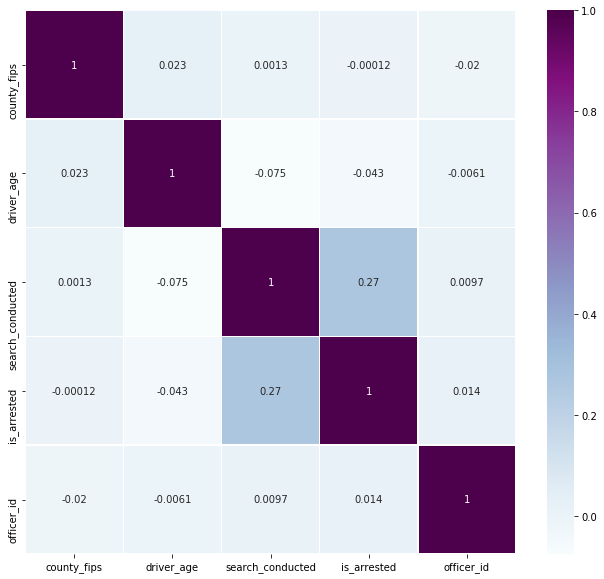

In [ ]:
#the correlation between columns of my DF
zf,ax = plt.subplots(figsize=(11,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="BuPu", ax=ax)
plt.show()
#it seems to exists some correlation between "search_conducted"and "is_arrested"..It is logical..

In [ ]:
df.head(8)#simple to check if all is good

,id,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age,driver_race,violation,search_conducted,search_type_raw,contraband_found,stop_outcome,is_arrested,officer_id
dt,,,,,,,,,,,,,,,,
2010-07-01 00:10:00,2010-00001,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX,M,22.0,White,Moving Violation,False,No Search Conducted,False,Citation,False,-1.562157e+09
2010-07-01 00:11:00,2010-00004,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN,F,18.0,White,Moving Violation,False,No Search Conducted,False,Arrest for Violation,True,-3.126844e+08
2010-07-01 00:35:00,2010-00005,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON,M,18.0,White,Moving Violation,False,No Search Conducted,False,Written Warning,False,9.225661e+08
2010-07-01 00:44:00,2010-00006,Hardwick,Caledonia County,50005.0,64000 I 91 N; MM64 I 91 N,ROYALTON,F,20.0,White,Vehicle Equipment,False,No Search Conducted,False,Written Warning,False,-6.032327e+08
2010-07-01 01:10:00,2010-00009,Rochester,Windsor County,50027.0,36000 I 91 S; MM36 I 91 S,ROCKINGHAM,M,24.0,Black,Moving Violation,False,No Search Conducted,False,Written Warning,False,2.939526e+08
2010-07-01 01:38:00,2010-00010,Rutland City,Rutland County,50021.0,WEST St,RUTLAND,M,19.0,White,Moving Violation,False,No Search Conducted,False,Written Warning,False,3.559631e+08
2010-07-01 01:45:00,2010-00011,Barnard,Windsor County,50027.0,I 91 N,ST JOHNSBURY,M,21.0,White,Moving Violation,False,No Search Conducted,False,Citation,False,2.733421e+08
2010-07-01 05:50:00,2010-00013,Lowell,Orleans County,50019.0,VT RT 100,HEADQUARTERS - FIELD FORCE,M,55.0,White,Moving Violation,False,No Search Conducted,False,Citation,False,-1.733191e+09


   # Data Analysis & Vizualization

#    Moving violation for each Gender

In [ ]:
# Create a DataFrame of female drivers
female = df[df.driver_gender == 'F']

# Create a DataFrame of male drivers
male = df[df.driver_gender == 'M']

# Compute the violations by female drivers
v_female=female.violation.value_counts(normalize=True)
print("Females possibilities for each type od violation \n",female.violation.value_counts(normalize=True))
# Compute the violations by male drivers 
v_male=male.violation.value_counts(normalize=True)


Females possibilities for each type od violation 
 Moving Violation             0.774051
Vehicle Equipment            0.189232
Externally Generated Stop    0.021552
Investigatory Stop           0.013167
Suspicion of DWI             0.001998
Name: violation, dtype: float64


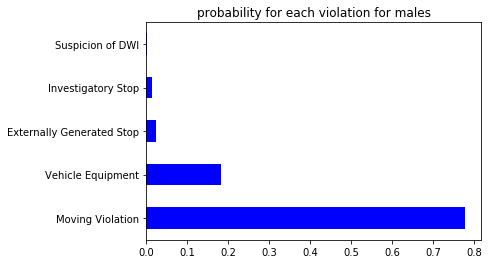

In [ ]:
#vizualization for males
v_male.plot(kind="barh",color="blue")
plt.title("probability for each violation for males")
plt.show()


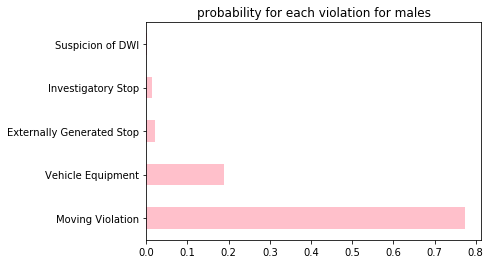

In [ ]:
#vizualization for females 1way
v_female.plot(kind="barh",color="pink")
plt.title("probability for each violation for males")
plt.show()


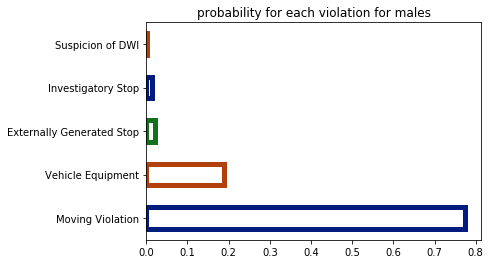

In [ ]:
#vizualization for females 2way
v_female.plot(kind="barh",facecolor=(0, 0, 0, 0),
                    linewidth=5,
                    edgecolor=sns.color_palette("dark", 3))
plt.title("probability for each violation for males")
plt.show()



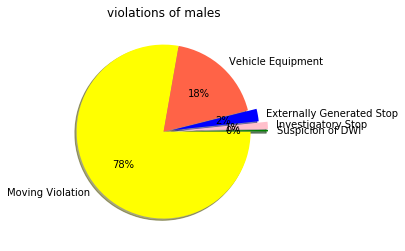

In [ ]:
#make the pie for males for each type of violation
labels=[v_male.index[0],v_male.index[1],v_male.index[2],v_male.index[3],v_male.index[4]]
colors=["yellow","tomato","blue","pink","green"]
values=[v_male[0],v_male[1],v_male[2],v_male[3],v_male[4]]
explode = (0, 0, 0.1, 0.2, 0.2)
plt.pie(values,labels=labels,colors=colors,autopct="%.lf%%",explode=explode,counterclock=False, shadow=True)
plt.title("violations of males")
plt.show()


#  For each Gender and violation find mean age

In [ ]:
#Create a pivot_table to find for each "gender" and "violation" the mean "driver_age"
piv=df.pivot_table(index="violation",columns="driver_gender",values="driver_age",aggfunc=np.mean)
piv

driver_gender,F,M
violation,,
Externally Generated Stop,34.744382,35.312624
Investigatory Stop,34.606897,34.464177
Moving Violation,38.688752,39.755848
Suspicion of DWI,37.166667,38.647173
Vehicle Equipment,37.115916,37.239567


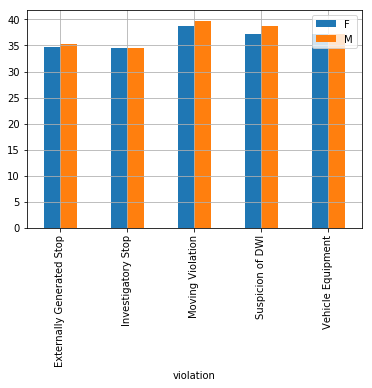

In [ ]:
#visualization
piv.plot(kind="bar")
plt.legend(loc="best")#find the best location to put the box

plt.grid()
plt.show()


 #  "Violation" regarded to "search_type_raw" ?
 

In [ ]:
#make a table for violation and search_type_raw
state3=pd.crosstab(df.violation,df.search_type_raw)
state3

search_type_raw,(Winooski) Passgr Srch,Consent Search-Probable Cause,Consent Search-Rsnbl Suspicion,No Search Conducted,Search with Warrant
violation,,,,,
Externally Generated Stop,0,146,53,5929,32
Investigatory Stop,0,131,46,3421,10
Moving Violation,1,1313,505,210166,115
Suspicion of DWI,0,33,13,659,6
Vehicle Equipment,0,583,229,49739,49


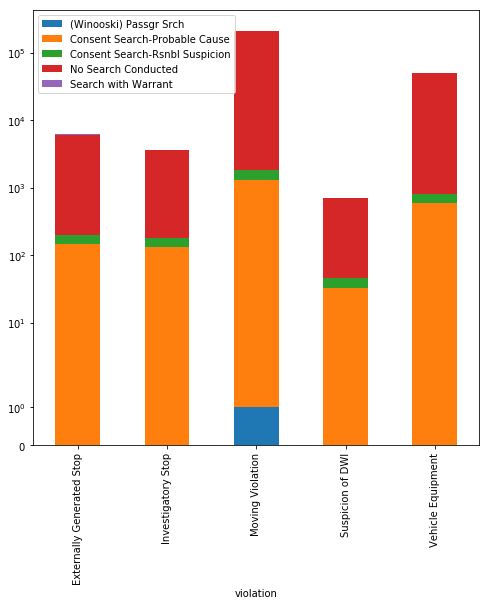

In [ ]:
state3.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.yscale("symlog",linthreshx=5.)#i take log because the no search is huge and dont seems good


plt.legend(loc="best")
plt.show()

# Place that stopped and Nation


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5571 entries, 2010-07-01 01:10:00 to 2015-12-31 21:10:00
Data columns (total 16 columns):
id                       5571 non-null object
location_raw             5571 non-null object
county_name              5571 non-null object
county_fips              5571 non-null float64
fine_grained_location    5571 non-null object
police_department        5571 non-null object
driver_gender            5571 non-null object
driver_age               5571 non-null float64
driver_race              5571 non-null object
violation                5571 non-null object
search_conducted         5571 non-null bool
search_type_raw          5571 non-null object
contraband_found         5571 non-null object
stop_outcome             5571 non-null object
is_arrested              5571 non-null bool
officer_id               5571 non-null float64
dtypes: bool(2), float64(3), object(11)
memory usage: 663.7+ KB
Brattleboro    295
Guilford       227
Rockingham     215
B

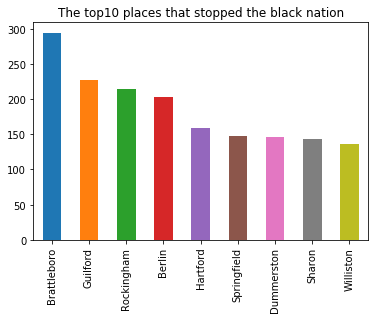

In [ ]:
#i group my data by  driver_race
race=df.groupby("driver_race")
#i want to examine the "black" nation
blacks=race.get_group("Black")
blacks.info()
#where stopped most of blacks?the top 10 places
print(blacks.location_raw.value_counts()[0:9])
blacks.location_raw.value_counts()[0:9].plot(kind="bar")
plt.title("The top10 places that stopped the black nation")
plt.show()



Brattleboro    8886
Rockingham     6492
Hartford       5625
Dorset         5245
Berlin         5212
Dummerston     4590
Fairlee        4470
Hartland       4458
Guilford       4288
Name: location_raw, dtype: int64


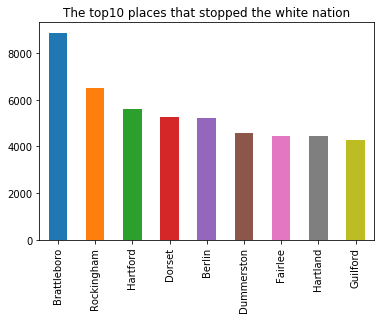

In [ ]:
#i want to examine the "White" nation
whites=race.get_group("White")

#where stopped most of whites?the top 10 places
print(whites.location_raw.value_counts()[0:9])
whites.location_raw.value_counts()[0:9].plot(kind="bar")
plt.title("The top10 places that stopped the white nation")
plt.show()


Rockingham     185
Brattleboro    159
Berlin         147
Guilford       136
Dummerston     110
Springfield    102
Royalton       100
Hartford       100
Williston       80
Name: location_raw, dtype: int64


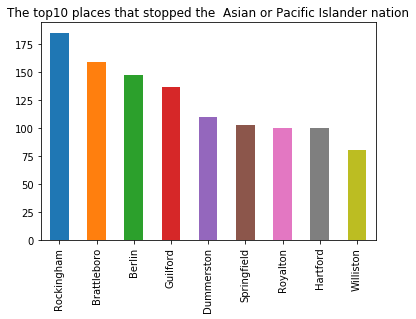

In [ ]:

#i want to examine the "Asian or Pacific Islander" nation
asian_pac=race.get_group("Asian or Pacific Islander")

#where stopped most of "Asian or Pacific"?the top 10 places
print(asian_pac.location_raw.value_counts()[0:9])
asian_pac.location_raw.value_counts()[0:9].plot(kind="bar")
plt.title("The top10 places that stopped the  Asian or Pacific Islander nation")
plt.show()


# Gender and Nation drivers

driver_race    Asian or Pacific Islander     Black  Hispanic     Other  \
driver_gender                                                            
F                               0.003741  0.004902  0.002119  0.000275   
M                               0.008873  0.015492  0.007259  0.000688   

driver_race       White  
driver_gender            
F              0.351769  
M              0.604882  


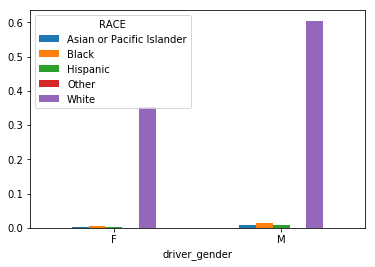

In [ ]:
#i want the probability
cr=pd.crosstab(df.driver_gender,df.driver_race,normalize=True)
print(cr)
#plot bar  the above
cr.plot(kind="bar",rot=0)
plt.legend(title="RACE",loc=2)
plt.show()


#  i want to see is_arested and age,sex

In [ ]:
# choose only the data for arrested
only_arrested=df[df.is_arrested==True]#df but only with id that arrested
only_arrested.head(4)


,id,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age,driver_race,violation,search_conducted,search_type_raw,contraband_found,stop_outcome,is_arrested,officer_id
dt,,,,,,,,,,,,,,,,
2010-07-01 00:11:00,2010-00004,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN,F,18.0,White,Moving Violation,False,No Search Conducted,False,Arrest for Violation,True,-312684437.0
2010-07-01 15:15:00,2010-00116,Montpelier,Washington County,50023.0,MONKTON RD,NEW HAVEN,M,25.0,White,Moving Violation,False,No Search Conducted,False,Arrest for Violation,True,972184080.0
2010-07-02 09:15:00,2010-00261,Salisbury,Addison County,50001.0,US RT 7,NEW HAVEN,M,46.0,White,Moving Violation,False,No Search Conducted,False,Arrest for Violation,True,972184080.0
2010-07-02 23:23:00,2010-00609,Fayston,Washington County,50023.0,GERMAN FLATS RD,MIDDLESEX,M,50.0,White,Moving Violation,False,No Search Conducted,False,Arrest for Violation,True,-964651717.0


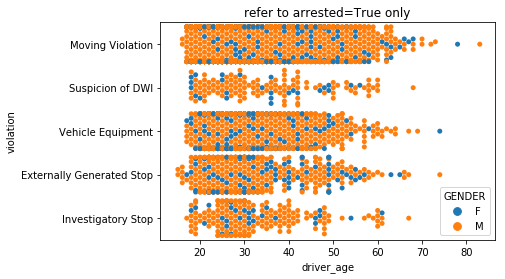

In [ ]:
#visualization
sns.swarmplot(x="driver_age",y="violation", hue="driver_gender",data=only_arrested)
plt.legend(title="GENDER",loc="best")
plt.title("refer to arrested=True only")
plt.show()


# Calculate the search rate for female and male

In [ ]:
# Calculate the search rate for female and male
print(df[df.driver_gender=="F"].search_conducted.mean())
print(df[df.driver_gender=="M"].search_conducted.mean())#is clear that the males is examine more often that female


0.0064977651320236906
0.015051589034170554


In [ ]:
# Calculate the search rate for each combination of gender and violation
print(df.groupby(['driver_gender','violation']).search_conducted.mean())


driver_gender  violation                
F              Externally Generated Stop    0.025281
               Investigatory Stop           0.029885
               Moving Violation             0.004940
               Suspicion of DWI             0.025253
               Vehicle Equipment            0.008904
M              Externally Generated Stop    0.043986
               Investigatory Stop           0.064264
               Moving Violation             0.011479
               Suspicion of DWI             0.091618
               Vehicle Equipment            0.021793
Name: search_conducted, dtype: float64


# Police station and the mean age of violation

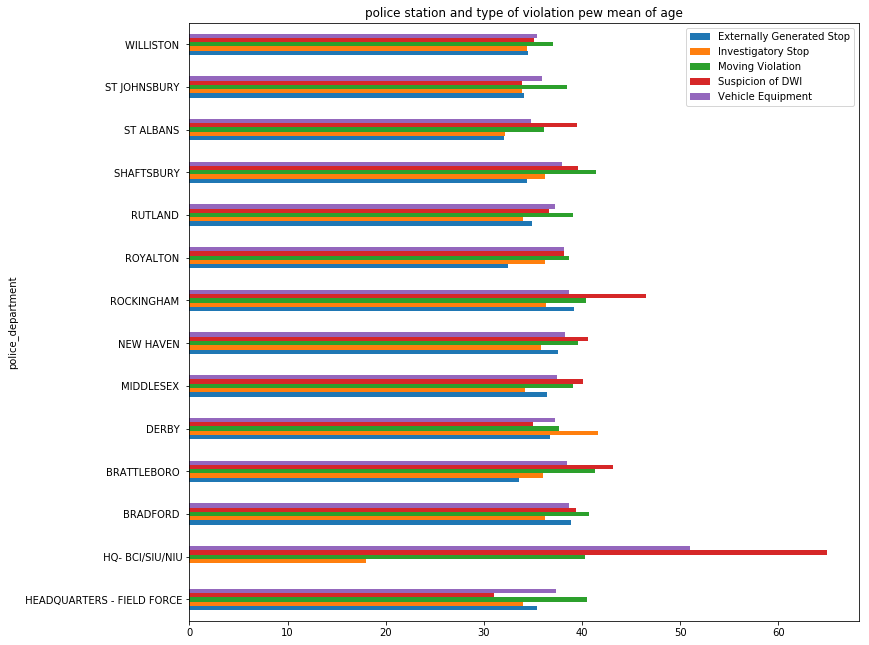

In [ ]:
##use pivot to find per police station the mean age of violation
piv=df.pivot_table(index="police_department",columns="violation",values="driver_age",aggfunc=np.mean)
fig=piv.plot(kind="barh",figsize=(12,11))
plt.title("police station and type of violation pew mean of age")
plt.legend(loc="best")
plt.show()



0.012014100644632274
dt
0     0.025763
1     0.035462
2     0.045024
3     0.050847
4     0.043478
5     0.011765
6     0.008982
7     0.003988
8     0.006484
9     0.006089
10    0.005952
11    0.007500
12    0.009573
13    0.008294
14    0.009614
15    0.007509
16    0.009669
17    0.010067
18    0.010298
19    0.012781
20    0.016594
21    0.015578
22    0.020292
23    0.021755
Name: is_arrested, dtype: float64


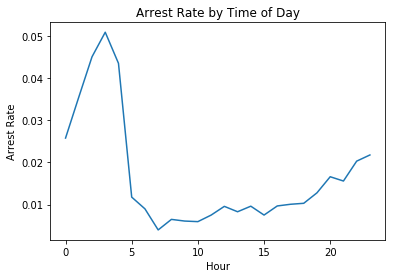

In [ ]:
# Calculate the overall arrest rate
print(df.is_arrested.mean())

# Calculate the hourly arrest rate
print(df.groupby(df.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = df.groupby(df.index.hour).is_arrested.mean()

#Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()



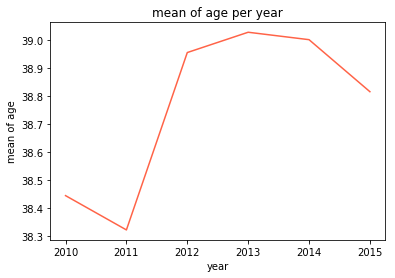

In [ ]:
#mean age stopped each year
df.driver_age.resample("Y").mean().plot(kind="line",color="tomato")
plt.xlabel("year")
plt.ylabel("mean of age")
plt.title("mean of age per year")

plt.show()


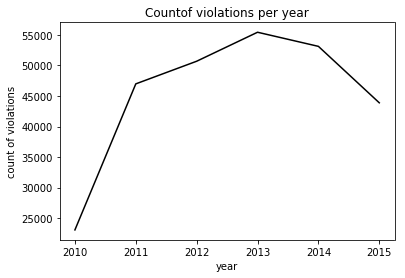

In [ ]:
#########i want per year to see the types of violations if change

(df.violation.resample("Y").count()).plot(kind="line",color="black")
plt.xlabel("year")
plt.ylabel("count of violations")
plt.title("Countof violations per year")
plt.show()





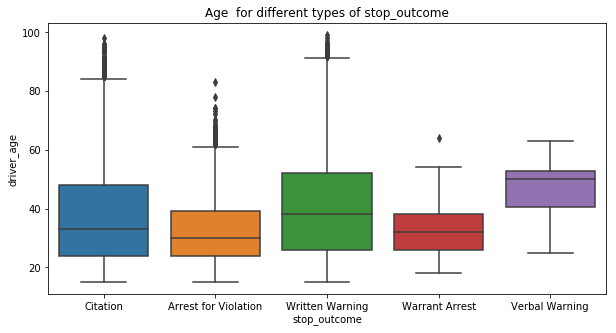

In [ ]:
#Age  for different types of stop_outcome BOXPLOT
plt.figure(figsize = (10,5))
plot = sns.boxplot(x = "stop_outcome", y = "driver_age", data = df)
plot.set_title("Age  for different types of stop_outcome")
plt.show()


In [ ]:
#some multiplots
sns.pairplot(df, hue="driver_gender", height=2.5)
plt.show()

C:\Users\jim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
